# **LEVEL 3**

## **Task 1: Restaurant Reviews**

**Analyze the text reviews to identify the most common positive and negative keywords.**
**Calculate the average length of reviews and explore if there is a relationship between
review length and rating.**


In [7]:

import pandas as pd
df = pd.read_csv('Dataset .csv')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Positive Keywords Frequency:
Rating text
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64

Negative Keywords Frequency:
Rating text
Average    3737
Poor        186
Name: count, dtype: int64

Average Review Length: 1.34 words


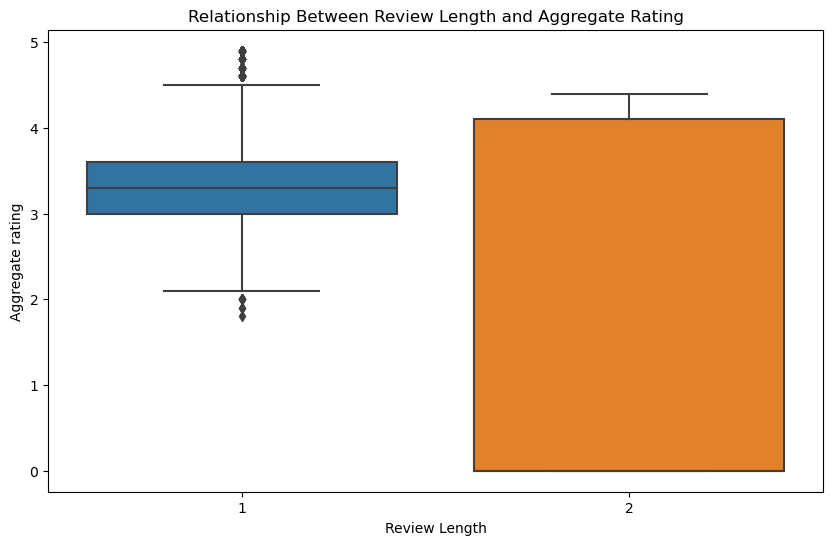


Average Aggregate Rating by Rating Text:
Rating text
Average      3.051619
Excellent    4.659801
Good         3.683429
Not rated    0.000000
Poor         2.297849
Very Good    4.168119
Name: Aggregate rating, dtype: float64


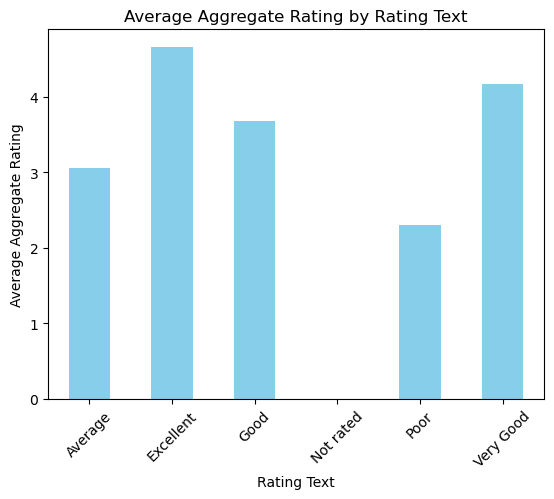

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Dataset .csv')

# Identify common positive/negative keywords from 'Rating text'
positive_keywords = ['Excellent', 'Very Good', 'Good']
negative_keywords = ['Average', 'Poor']

positive_counts = df[df['Rating text'].isin(positive_keywords)]['Rating text'].value_counts()
negative_counts = df[df['Rating text'].isin(negative_keywords)]['Rating text'].value_counts()

print("Positive Keywords Frequency:")
print(positive_counts)
print("\nNegative Keywords Frequency:")
print(negative_counts)

# Calculate average length of 'Rating text' (treated as review here)
df['Review Length'] = df['Rating text'].apply(lambda x: len(x.split()))
average_length = df['Review Length'].mean()
print(f"\nAverage Review Length: {average_length:.2f} words")

#  Explore relationship between review length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Review Length', y='Aggregate rating', data=df)
plt.title('Relationship Between Review Length and Aggregate Rating')
plt.show()

# Task 4: Analyze average aggregate rating by rating text
average_ratings_by_text = df.groupby('Rating text')['Aggregate rating'].mean()
print("\nAverage Aggregate Rating by Rating Text:")
print(average_ratings_by_text)

# Task 5: Visualize average ratings by rating text
average_ratings_by_text.plot(kind='bar', color='skyblue')
plt.title('Average Aggregate Rating by Rating Text')
plt.ylabel('Average Aggregate Rating')
plt.xlabel('Rating Text')
plt.xticks(rotation=45)
plt.show()


## **Task 2:  Votes Analysis**

**Identify the restaurants with the highest and
lowest number of votes.**
**Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.**


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)
print(df.head(2))


   Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is d

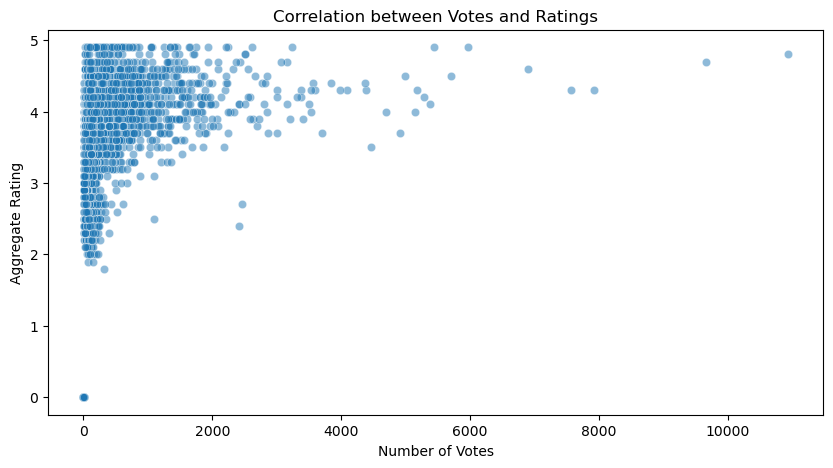

In [10]:

# Selecting relevant columns
data = df[["Restaurant Name", "Votes", "Aggregate rating"]]

# Identifying restaurants with highest and lowest votes
highest_votes = data.loc[data["Votes"].idxmax()]
lowest_votes = data.loc[data["Votes"].idxmin()]


# Scatter plot to analyze correlation between votes and rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data["Votes"], y=data["Aggregate rating"], alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Correlation between Votes and Ratings")
plt.show()


In [11]:
# Print final results
print("Final Conclusion:\n")
print(f"1. Restaurant with the Most Votes:\n   - Name: {highest_votes['Restaurant Name']}\n   - Votes: {highest_votes['Votes']}\n   - Rating: {highest_votes['Aggregate rating']}\n")
print(f"2. Restaurant with the Least Votes:\n   - Name: {lowest_votes['Restaurant Name']}\n   - Votes: {lowest_votes['Votes']}\n   - Rating: {lowest_votes['Aggregate rating']}\n")

# Checking correlation coefficient
correlation = data[["Votes", "Aggregate rating"]].corr().loc["Votes", "Aggregate rating"]
print(f"3. Correlation Between Votes and Ratings:\n   - Correlation Coefficient: {correlation:.2f}\n")
if correlation > 0:
    print("   - Interpretation: There is a weak to moderate positive correlation between votes and ratings.")
    print("   - Conclusion: Restaurants with higher ratings tend to receive more votes, but the relationship is not very strong.")


Final Conclusion:

1. Restaurant with the Most Votes:
   - Name: Toit
   - Votes: 10934
   - Rating: 4.8

2. Restaurant with the Least Votes:
   - Name: Cantinho da Gula
   - Votes: 0
   - Rating: 0.0

3. Correlation Between Votes and Ratings:
   - Correlation Coefficient: 0.31

   - Interpretation: There is a weak to moderate positive correlation between votes and ratings.
   - Conclusion: Restaurants with higher ratings tend to receive more votes, but the relationship is not very strong.



## **Task 3:  Price Range vs. Online Delivery and Table Booking**

**Identify the restaurants with the highest and
lowest number of votes.**
**Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.**


In [12]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)
print(df.head(2))

   Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is d

<Figure size 1000x500 with 0 Axes>

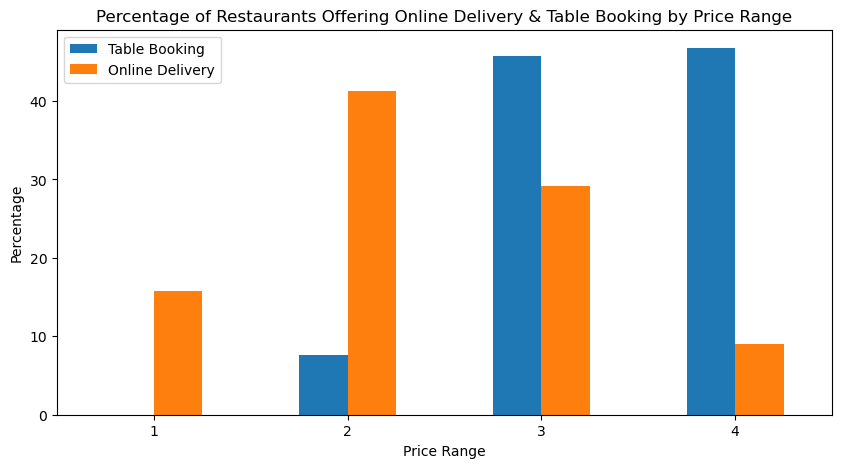

In [5]:

# Selecting relevant columns
data = df[["Price range", "Has Table booking", "Has Online delivery"]].copy()

# Ensure data consistency by dropping rows with missing values
data.dropna(inplace=True)

# Converting categorical values to numerical for analysis
mapping = {"Yes": 1, "No": 0}
data["Has Table booking"] = data["Has Table booking"].map(mapping)
data["Has Online delivery"] = data["Has Online delivery"].map(mapping)

# Grouping by Price range to calculate the percentage of restaurants offering these services
price_analysis = data.groupby("Price range").mean() * 100

# Plotting the results
plt.figure(figsize=(10, 5))
price_analysis.plot(kind='bar', figsize=(10, 5), rot=0)
plt.title("Percentage of Restaurants Offering Online Delivery & Table Booking by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(["Table Booking", "Online Delivery"], loc='upper left')
plt.show()

# Extract insights from the dataset for final conclusions
table_booking_trend = price_analysis["Has Table booking"].to_dict()
online_delivery_trend = price_analysis["Has Online delivery"].to_dict()

# Determine the general trend
table_booking_increases = all(x <= y for x, y in zip(list(table_booking_trend.values())[:-1], list(table_booking_trend.values())[1:]))
online_delivery_increases = all(x <= y for x, y in zip(list(online_delivery_trend.values())[:-1], list(online_delivery_trend.values())[1:]))


In [4]:
# Print the final results
print("Final Analysis:")
print("\n1. Table Booking Trend:")
for price, percentage in table_booking_trend.items():
    print(f"   - Price Range {price}: {percentage:.2f}% of restaurants offer table booking.")
if table_booking_increases:
    print("   - Conclusion: Higher-priced restaurants are more likely to offer table booking.")
else:
    print("   - Conclusion: No strong relationship between price range and table booking availability.")

print("\n2. Online Delivery Trend:")
for price, percentage in online_delivery_trend.items():
    print(f"   - Price Range {price}: {percentage:.2f}% of restaurants offer online delivery.")
if online_delivery_increases:
    print("   - Conclusion: Higher-priced restaurants are more likely to offer online delivery.")
else:
    print("   - Conclusion: No strong relationship between price range and online delivery availability.")

Final Analysis:

1. Table Booking Trend:
   - Price Range 1: 0.02% of restaurants offer table booking.
   - Price Range 2: 7.68% of restaurants offer table booking.
   - Price Range 3: 45.74% of restaurants offer table booking.
   - Price Range 4: 46.76% of restaurants offer table booking.
   - Conclusion: Higher-priced restaurants are more likely to offer table booking.

2. Online Delivery Trend:
   - Price Range 1: 15.77% of restaurants offer online delivery.
   - Price Range 2: 41.31% of restaurants offer online delivery.
   - Price Range 3: 29.19% of restaurants offer online delivery.
   - Price Range 4: 9.04% of restaurants offer online delivery.
   - Conclusion: No strong relationship between price range and online delivery availability.


                                                           ---End of Tasks---